In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

# Set matplotlib style and parameters
plt.style.use(["science", "no-latex"])


/home/olarinoyem/miniconda3/envs/deep_tf/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Update matplotlib rcParams for consistent plot settings
plt.rcParams.update(
    {
        "font.size": 16,
        "figure.figsize": [10, 6],
        "text.usetex": False,
        "figure.facecolor": "white",
        "figure.autolayout": True,
        "figure.dpi": 600,
        "savefig.dpi": 600,
        "savefig.format": "pdf",
        "savefig.bbox": "tight",
        "axes.labelweight": "bold",
        "axes.titleweight": "bold",
        "axes.labelsize": 14,
        "axes.titlesize": 20,
        "axes.facecolor": "white",
        "axes.grid": False,
        "axes.spines.top": True,
        "axes.spines.right": True,
        "axes.formatter.limits": (0, 5),
        "axes.formatter.use_mathtext": True,
        "axes.formatter.useoffset": False,
        "axes.xmargin": 0,
        "axes.ymargin": 0,
        "legend.fontsize": 16,
        "legend.frameon": True,
        "legend.loc": "best",
        "lines.linewidth": 2.5,
        "lines.markersize": 10,
        "xtick.labelsize": 14,
        "xtick.direction": "in",
        "xtick.top": True,
        "ytick.labelsize": 14,
        "ytick.direction": "in",
        "ytick.right": True,
        "grid.color": "grey",
        "grid.linestyle": "--",
        "grid.linewidth": 0.75,
        "errorbar.capsize": 4,
        "figure.subplot.wspace": 0.4,
        "figure.subplot.hspace": 0.4,
        "image.cmap": "viridis",
        "lines.antialiased": True,
        "patch.antialiased": True,
        "text.antialiased": True,
        "axes.labelpad": 10,
        "axes.titlepad": 15,
        "xtick.major.pad": 5,
        "ytick.major.pad": 5,
        "figure.subplot.left": 0.1,
        "figure.subplot.right": 0.95,
        "figure.subplot.bottom": 0.1,
        "figure.subplot.top": 0.9,
    }
)

In [3]:
# Load the shapefile
gdf = gpd.read_file('../data/raw/NHS_England_Regions_July_2022_EN_BFC_2022_-5487250391308697487/NHSER_JUL_2022_EN_BFC.shp')
gdf.head()


,NHSER22CD,NHSER22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E40000003,London,517515,178392,-0.308660,51.4923,0ed9266f-d879-4018-b6f4-93e9141d17c5,"MULTIPOLYGON (((516122.679 172421.288, 516112...."
1,E40000005,South East,471724,171073,-0.969570,51.4341,e65f164c-d972-4631-88ac-c4502d165b8f,"MULTIPOLYGON (((429043.995 84840.073, 429056.1..."
2,E40000006,South West,285015,102567,-3.633430,50.8112,4c391736-de3a-4949-bfa1-28796fab96d4,"MULTIPOLYGON (((83962.84 5401.15, 83970.68 540..."
3,E40000007,East of England,565970,255923,0.425889,52.1766,6b5f57d5-9882-48ca-bfe0-50bb8e40266c,"MULTIPOLYGON (((570605.06 181382.25, 570608.21..."
4,E40000010,North West,356889,444857,-2.657550,53.8981,06dbe856-2d3b-478c-aaa5-205ab8e6ba43,"MULTIPOLYGON (((327869.488 373719.637, 327869...."


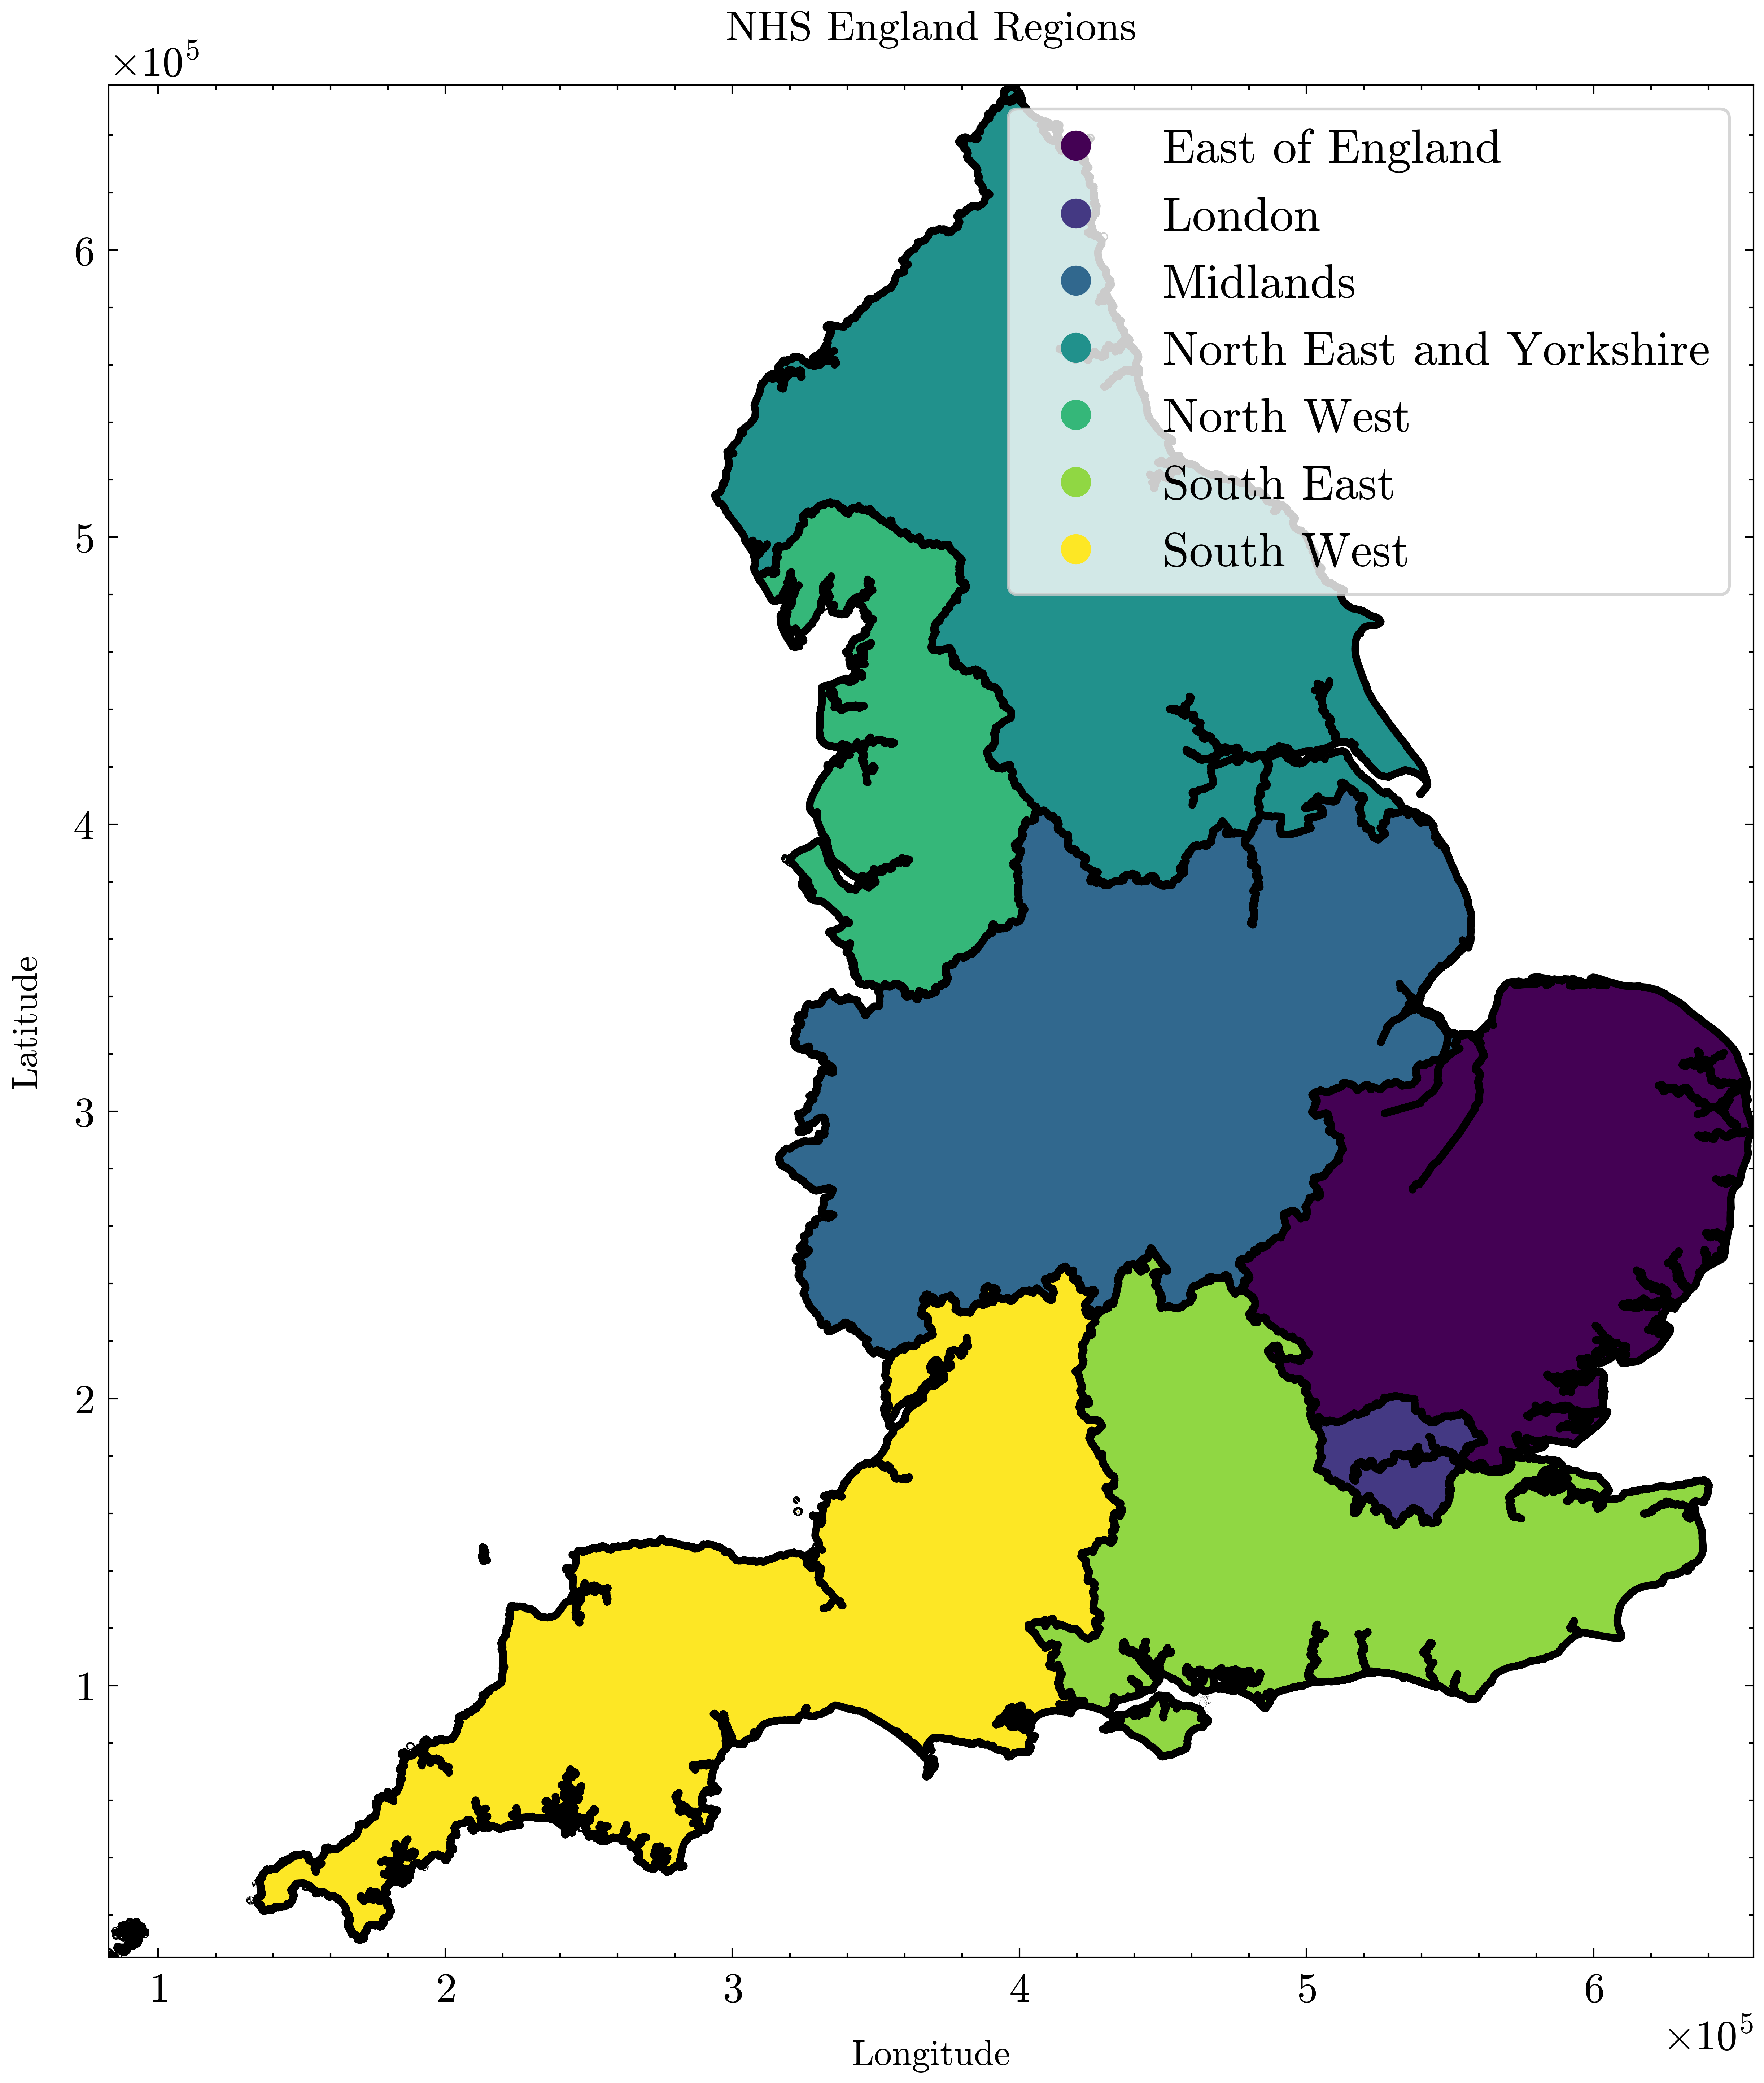

In [4]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the UK
gdf.boundary.plot(ax=ax, color='black')

# Plot the regions with different colors
gdf.plot(ax=ax, column='NHSER22NM', legend=True, cmap='viridis')

# Add labels
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
# for idx, row in gdf.iterrows():
#     plt.annotate(text=row['NHSER22NM'], xy=row['coords'], horizontalalignment='center')

# Set labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('NHS England Regions', fontsize=14)

plt.show()

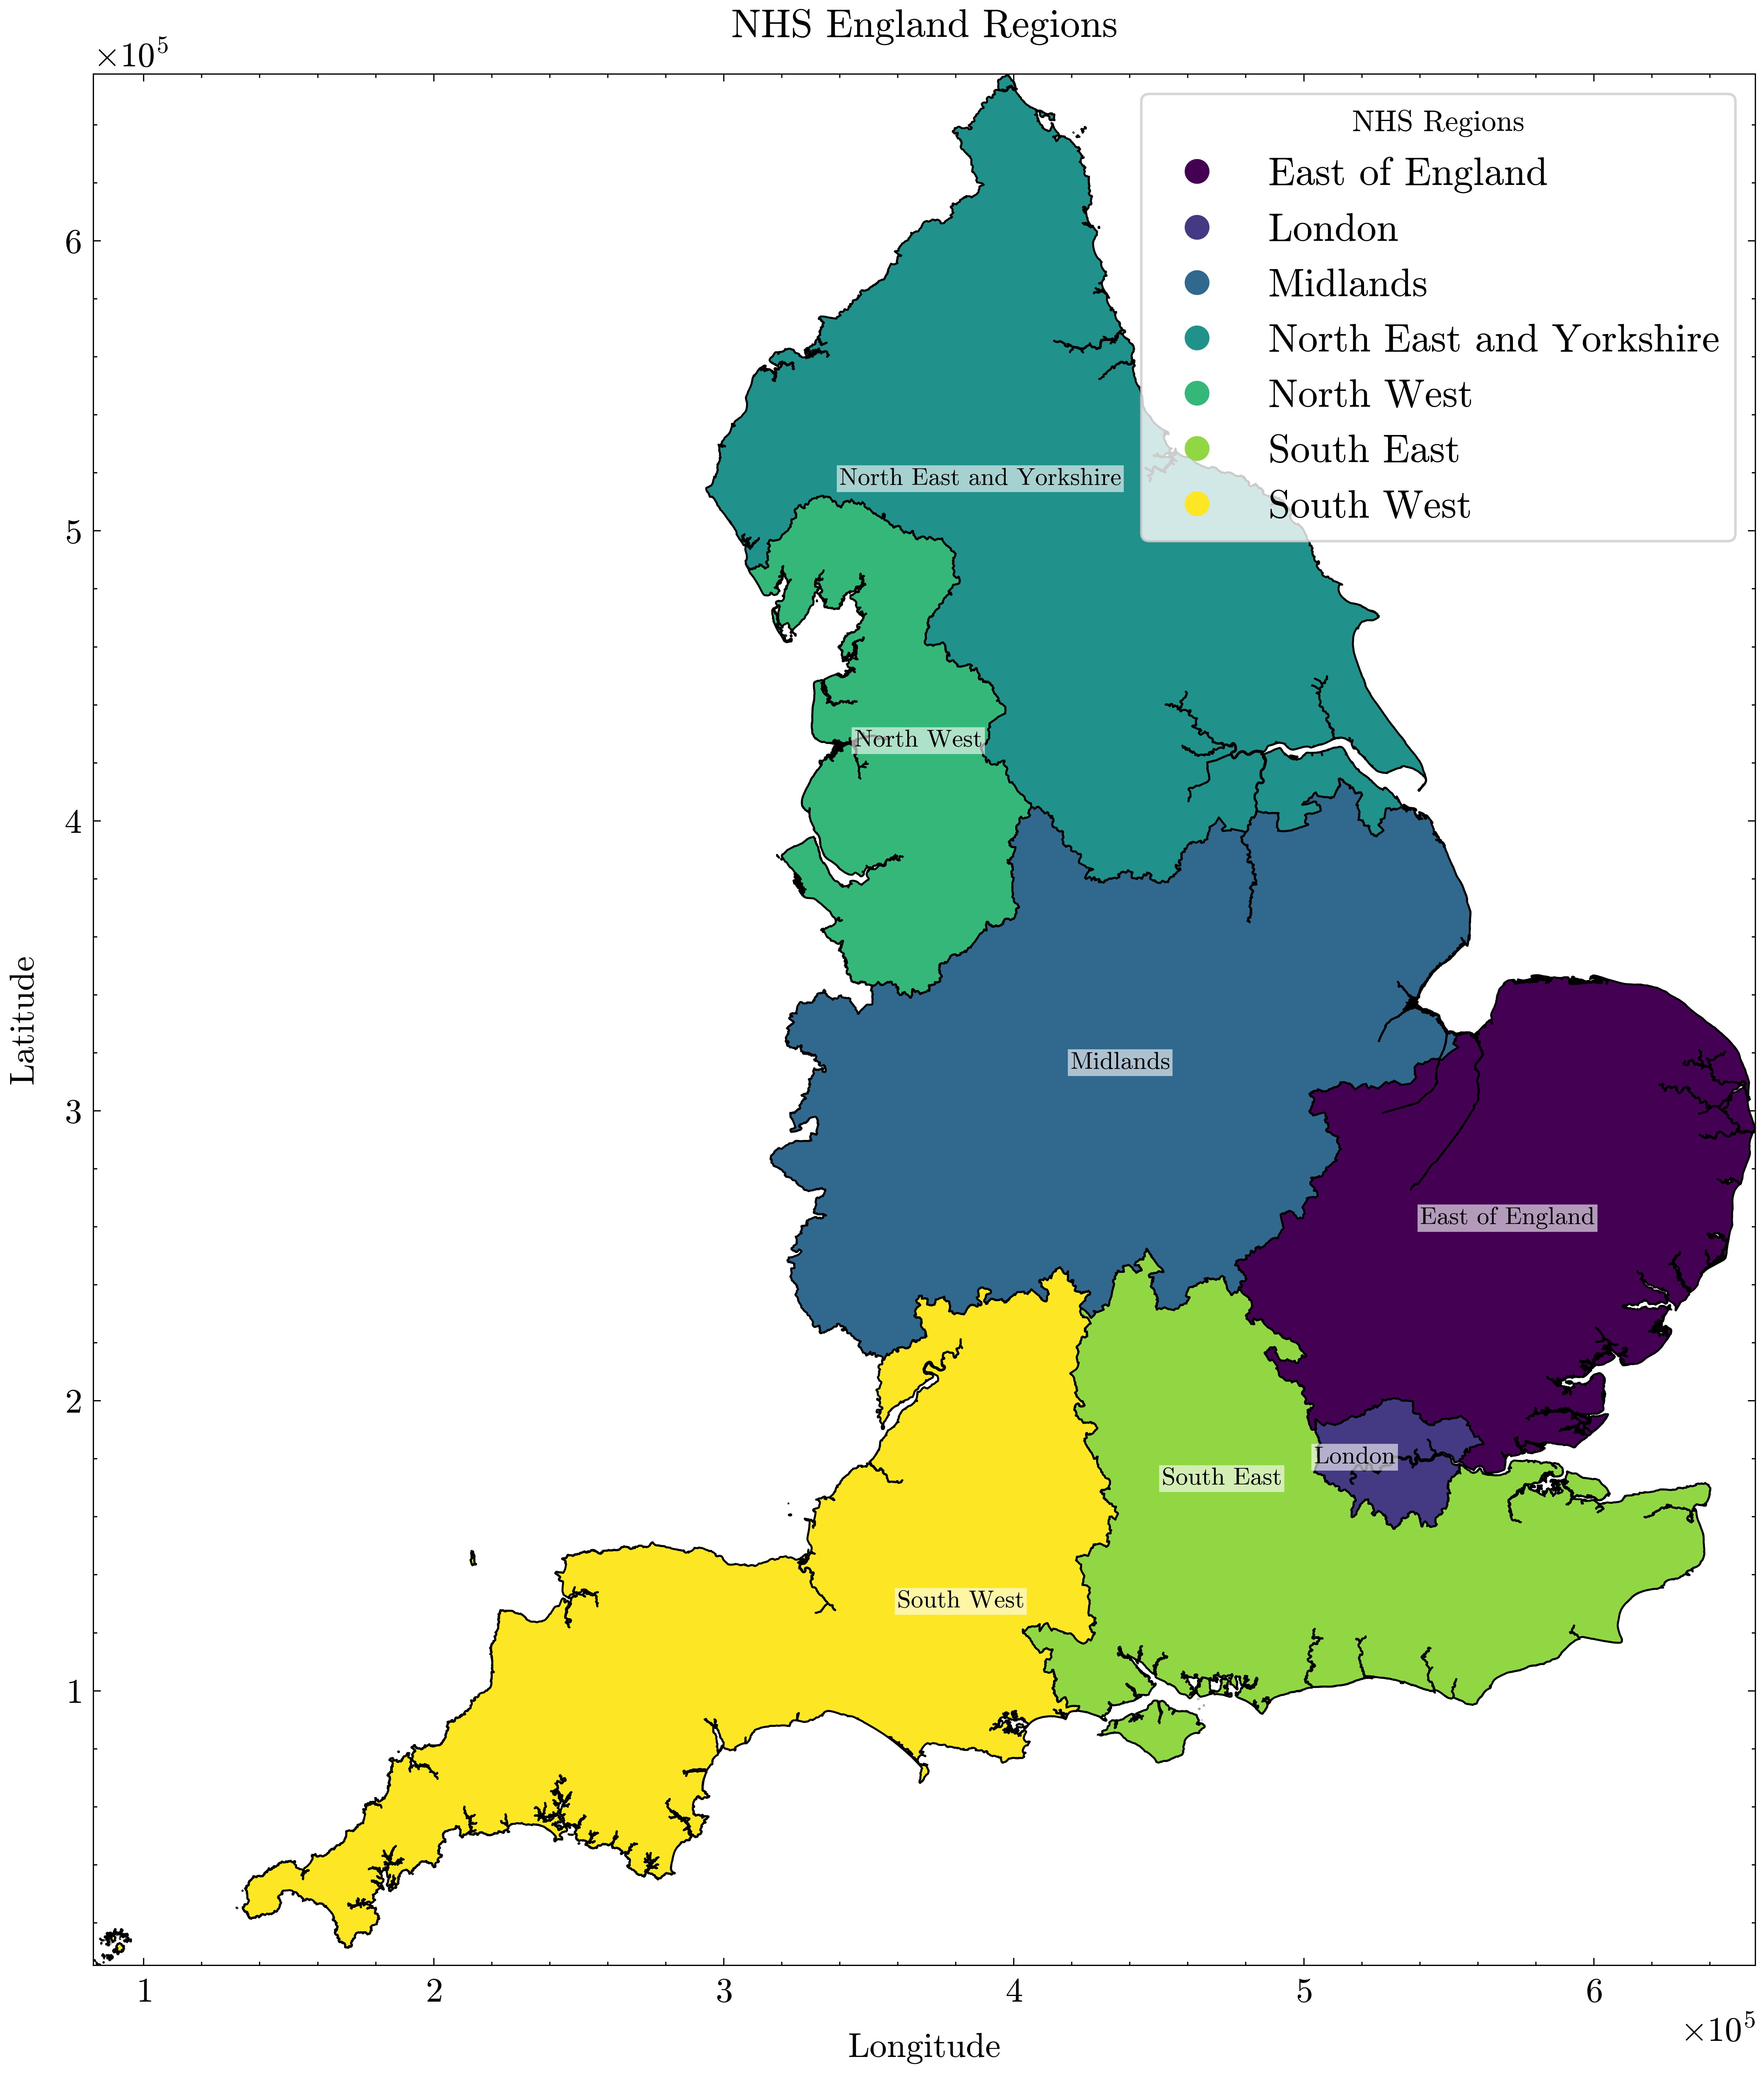

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the shapefile
gdf = gpd.read_file('../data/raw/NHS_England_Regions_July_2022_EN_BFC_2022_-5487250391308697487/NHSER_JUL_2022_EN_BFC.shp')

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the UK boundaries
gdf.boundary.plot(ax=ax, color='black', linewidth=0.8)

# Plot the regions with different colors
gdf.plot(ax=ax, column='NHSER22NM', legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)

# Add labels to each region
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
for idx, row in gdf.iterrows():
    plt.annotate(text=row['NHSER22NM'], xy=row['coords'], 
                 horizontalalignment='center', fontsize=10, 
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))

# Customize the plot
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title('NHS England Regions', fontsize=16, weight='bold')

# Customize the legend and position it in the top right corner
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title('NHS Regions', prop={'size': 12, 'weight': 'bold'})

# Save the plot as a high-resolution image
plt.savefig('../reports/figures/NHS_England_Regions.png', dpi=600, bbox_inches='tight')

plt.show()
